***CardioVascular CSV Dataset Preprocessing***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Introduction***

-The Cardiovascular disease dataset consists of 70,000 records of patients data.

-This dataset is made up of 12 columns of patients records.

-All of the dataset values were collected at the moment of medical examination.

In [3]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In this section our goal is to load my dataset and its structure and perform prelimiinary wrangling if needed. That is further cleaning, to ensure my data is in a tidy form.

Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [4]:
#load in the dataset into a pandas dataframe and check its structure
cardio = pd.read_csv("/content/drive/MyDrive/Data Mining & ML _PROJECT/cardiovascular.csv")

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#high-level overview of data shape and composition
print(cardio.shape)

print(cardio.dtypes)
print(cardio.head(10))

(70000, 13)
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.

In [6]:
#checking for null values and dropping columns with null values

print(cardio.isnull())
cardio = cardio.dropna(axis=1)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
0      False  False   False   False   False  False  False        False  False   
1      False  False   False   False   False  False  False        False  False   
2      False  False   False   False   False  False  False        False  False   
3      False  False   False   False   False  False  False        False  False   
4      False  False   False   False   False  False  False        False  False   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  False  False   False   False   False  False  False        False  False   
69996  False  False   False   False   False  False  False        False  False   
69997  False  False   False   False   False  False  False        False  False   
69998  False  False   False   False   False  False  False        False  False   
69999  False  False   False   False   False  False  False        False  False   

       smoke   alco  active

In [7]:
# Now we can see that there are no null values in any column
null_summary = cardio.isnull().sum()
print(null_summary)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [8]:
#checking for duplicates
print(cardio.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool


In [9]:
cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
# Changing AGE from days format to year format
def age_years(age):
    ages = age /365
    return ages
'''This function divides age by 365 to give it in years'''

cardio['age'] = cardio['age'].apply(age_years)

cardio.head()

cardio['age'] = cardio['age'].astype(float).apply(np.ceil)

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,51.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# converting new age column data type back to integer
cardio['age']= cardio['age'].astype(int)

cardio['age'].head(5)

,age
0,51
1,56
2,52
3,49
4,48


In [12]:
#converting all qualitative variables into object data types
cardio[['gender','cholesterol','gluc','smoke','alco','active','cardio']] = cardio[['gender','cholesterol','gluc','smoke','alco','active','cardio']].astype(str)

In [13]:
#Renaming some of the column names to proper naming conventions

cardio = cardio.rename(columns={"gluc": "glucose", "ap_lo": "diastolic", "ap_hi": "systolic", "cholesterol": "cholesterol_level", "smoke": "smoker", "alco": "alcoholic", "active": "physically_active", "cardio": "cardiovascular_disease"})

cardio.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease
0,0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
#Replacing values in column with corresponding variable names (1 = Female, 2 = Male)
cardio['gender'] = cardio['gender'].replace({'1' :'Female','2': 'Male'},inplace=False )
cardio['cholesterol_level']=cardio['cholesterol_level'].replace({'1':'Normal','2':'High','3':'Extremely High'},inplace = False)
cardio['glucose'] =cardio['glucose'].replace({'1':'Normal','2':'High','3':'Extremely High'},inplace = False)
cardio['smoker'] =cardio['smoker'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['alcoholic'] =cardio['alcoholic'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['physically_active']=cardio['physically_active'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['cardiovascular_disease'] = cardio['cardiovascular_disease'].replace({'1': 'Yes','0':'No'},inplace = False)

cardio.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No


In [15]:
#Adding a new column 'BMI' to the data frame
cardio['bmi']=(cardio['weight']/(cardio['height'] **2) * 10000)
cardio['bmi']=cardio['bmi'].round(decimals = 1)

In [16]:
#Checking to see all the wrangling performed
print(cardio.shape)
print(cardio.dtypes)
print(cardio.head(5))

(70000, 14)
id                          int64
age                         int64
gender                     object
height                      int64
weight                    float64
systolic                    int64
diastolic                   int64
cholesterol_level          object
glucose                    object
smoker                     object
alcoholic                  object
physically_active          object
cardiovascular_disease     object
bmi                       float64
dtype: object
   id  age  gender  height  weight  systolic  diastolic cholesterol_level  \
0   0   51    Male     168    62.0       110         80            Normal   
1   1   56  Female     156    85.0       140         90    Extremely High   
2   2   52  Female     165    64.0       130         70    Extremely High   
3   3   49    Male     169    82.0       150        100            Normal   
4   4   48  Female     156    56.0       100         60            Normal   

  glucose smoker alcoholic physical

In [17]:
#convert categorical ordinal columns into CategoricalDataType
var_dict = {'cholesterol_level':['Normal','High','Extremely High'],
            'glucose':['Normal','High','Extremely High']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    cardio[var]=cardio[var].astype(ordered_var)

cardio.head()


,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0


In [18]:
#Checking the statistics of the dataset using describe()
cardio.describe()

,id,age,height,weight,systolic,diastolic,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.837914,164.359229,74.205690,128.817286,96.630414,27.555330
std,28851.302323,6.766821,8.210126,14.395757,154.011419,188.472530,6.092593
min,0.000000,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,25006.750000,49.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,50001.500000,54.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,74889.250000,59.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,99999.000000,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


In [19]:
#saving this cleaned dataframe to csv to use in the explanatory phase
cardio.to_csv('cardio_clean.csv', index= False)
#cardio_bp.to_csv('cardio_bp.csv', index = False)

**Dataset Structure:**

Our dataset initially had 70,000 rows and 12 columns.

The age column was in days, so we created a function that we applied to the entire column and rounded it up to a whole number.

We noticed that some of our columns were not in the desired data types, and the contents of some columns were in binary form, representing certain keywords. We wrangled these columns to obtain our desired data types and meaningful value names.

We also observed inappropriate naming conventions in some of the columns, so we renamed them accordingly.

A particular variable, BMI, that we were interested in exploring was missing. We performed feature engineering to create it using the height and weight columns in the dataset.

The cholesterol and glucose variables are ordered factor variables with the following levels: NORMAL, HIGH, and EXTREMELY HIGH.

These cholesterol and glucose columns, which are ordinal categorical variables, were also converted to their appropriate data types.

The numeric variables in the dataset are age, height, weight, systolic, diastolic, and BMI, while the rest are qualitative variables.

**Main Features of interest in the dataset:**

This dataset contains many interesting features that we believe are worthwhile to explore. We will be analysing all columns except the ‘id’ column. The features include age, gender, height, weight, systolic, diastolic, cholesterol, glucose, smoking, alcohol intake, physical activity, cardiovascular disease, and BMI. Some of these have been proven to be significant risk factors for cardiovascular diseases.

### Main Features of interest in the dataset:

> This dataset has a lot of interesting features that I believe would be worthwile to explore, so I will be exploring all besides the 'id'column.
The Features are the age,gender, height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol intake,physical activity, cv disease and bmi.
Some of these are features that have been said and proven to be risk factors of Cardiovascular diseases.


In [20]:
cardiovascular = pd.read_csv("/content/cardio_clean.csv")

cardiovascular.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0


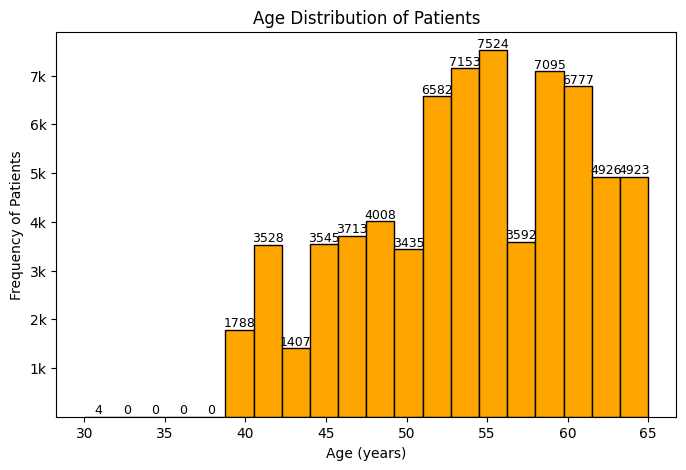

In [21]:
import matplotlib.pyplot as plt

# Setting figure size
plt.figure(figsize=[8,5])

# Setting ticks and labels
ticks = [1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = ['1k', '2k', '3k', '4k', '5k', '6k', '7k']

# Plot histogram and capture counts and bin edges
counts, bins, patches = plt.hist(data=cardiovascular, x='age', bins=20, color='orange', edgecolor='black')

# Add text labels on each bar
for count, bin_edge in zip(counts, bins):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count,     # x position and y position
             str(int(count)),                                # convert count to integer
             ha='center', va='bottom', fontsize=9, color='black')

# Setting title and axis labels
plt.title('Age Distribution of Patients')
plt.ylabel('Frequency of Patients')
plt.xlabel('Age (years)')
plt.yticks(ticks, labels)

plt.show()


There seems to be some outliers from 40 below to 30,which is the minimum from the summary statistics. After applying a limit to the x axis. The distribution is a bimodal one with peaks at 53 and 56 respectively and a majority of the distribution of patients are between 50 and 65 . It is also observed that this dataset involves adults only.

2. Distribution Based on Height and Weight

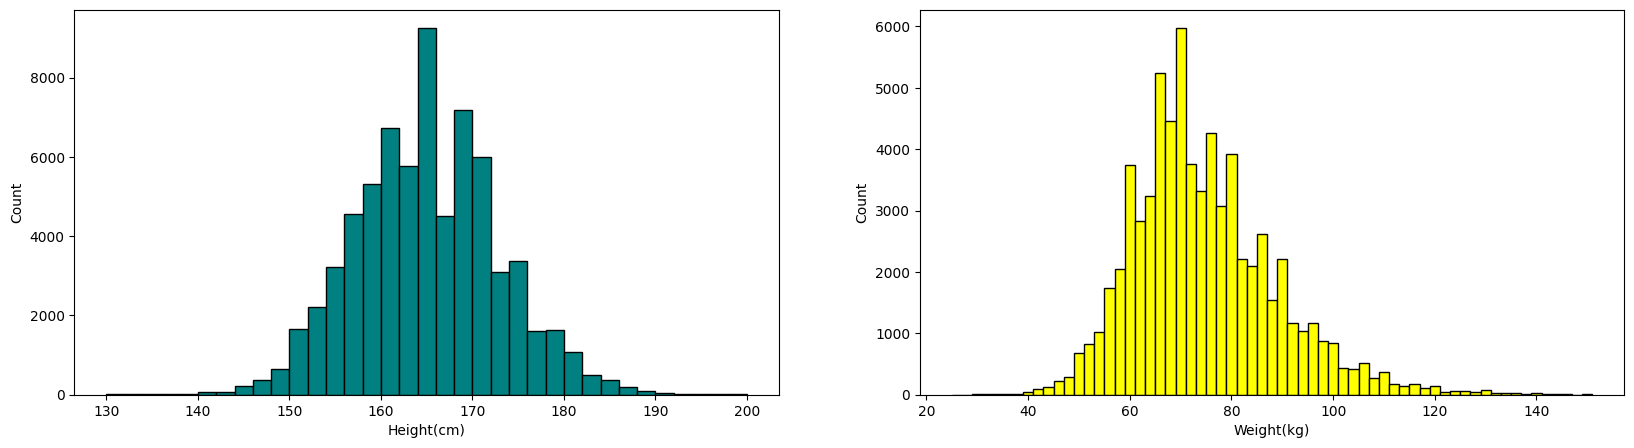

In [22]:
#using a standard scaled Hist plot and subplot
plt.figure(figsize = [20,5])

#For the first plot
plt.subplot(1, 2, 1)
binsize = 2
bins = np.arange(130,200+binsize,binsize)
plt.hist(data=cardiovascular,x='height',bins = bins, color='teal',edgecolor='black')
plt.xlabel('Height(cm)')
plt.ylabel('Count')

#For the second plot
plt.subplot(1, 2, 2)
binsize = 2
bins = np.arange(25,150+binsize,binsize)
plt.hist(data=cardiovascular,x='weight',bins=bins, color='yellow', edgecolor='black')
plt.xlabel('Weight(kg)')
plt.ylabel('Count');

### Observation:
From this plot Height has unimodal distribution with most of the heights falling mostly at about 165cm. This is normal as the average height of adults is 160cm to 170cm. The plot spikes around 170cm too.

For the weight. Majority of the distribution fell between 40kg and 120kg.
After setting binsize and limiting the x scale to see the distribution. We discovered it was a unimodal distribution as the spike was at about 70kg which is normal for an average adults weight.

3. Distribution based on glucose and cholestrol

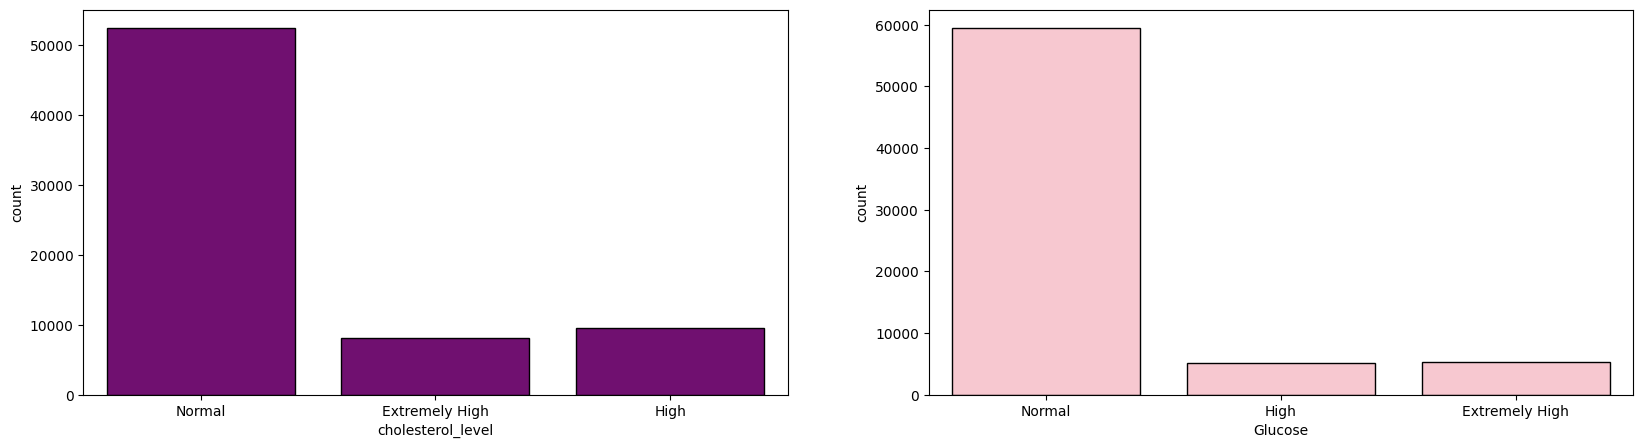

In [23]:
#setting figure size
plt.figure(figsize = [20,5])

#Setting my base color
base_color = sb.color_palette()[0]

#Using seaborns countplot and subplot
#First plot
plt.subplot(1, 2, 1)
sb.countplot(data = cardiovascular,x ='cholesterol_level',color='purple', edgecolor='black');
plt.xlabel('cholesterol_level');

#For the second plot
plt.subplot(1,2,2)
sb.countplot(data = cardiovascular,x ='glucose',color='pink', edgecolor='black');
plt.xlabel('Glucose');

### Observation:
The dataset doesnt indicate what levels fall into these categories.From observation, more than 50,000 of the patients have a normal cholesterol level. Patients with high cholesterol level slightly higher than those with and extremely high level.

It would be interesting to further explore this variable later on.

For the Glucose variable, the same applies about the dataset. From observation almost 60,000 patients have normal glucose level  with high and extremely glucose levels at about 5000 each.

3. Distribution Based on BMI

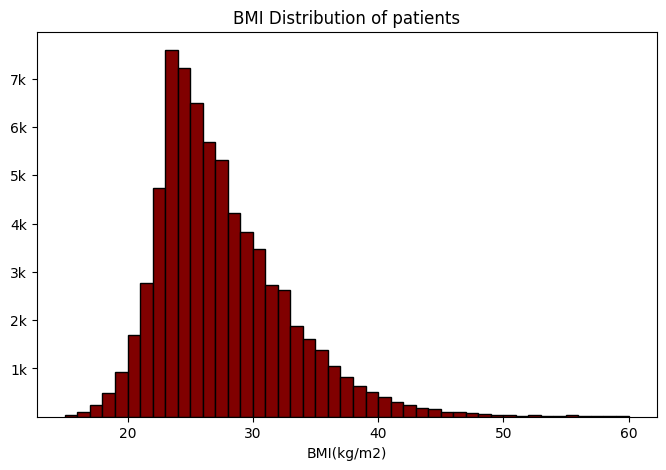

In [24]:
#Using a standard hist plot and setting bin size
binsize = 1
bin_edge = np.arange(15,60+binsize,binsize)
plt.figure(figsize=[8,5])
plt.hist(data= cardiovascular, x ='bmi',bins=bin_edge, color='maroon', edgecolor='black')
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
plt.yticks(ticks,labels)

plt.title('BMI Distribution of patients')
plt.xlabel('BMI(kg/m2)')
plt.show()

### Observation:
It was observed that there are outliers in the dataset, particularly from 60. There is need for further invesigation on this. After setting bin sizes to see the distribution more,A Unimodal right skewed distribution is observed. its peak falls around 24. This falls in the healthy category on the BMI scale.

It would be interesting to see its relationship with other variables later. As the Bmi is a major indication for cardiovascular disease.


4. Distribution based on Alcohol Intake

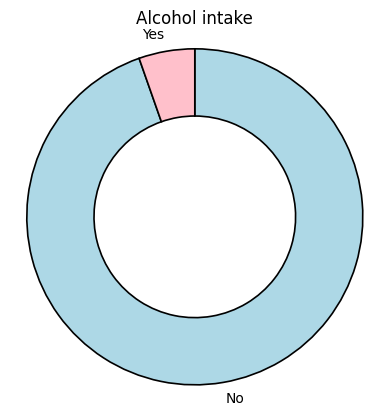

In [25]:
#setting my column unique value count
category = cardiovascular['alcoholic'].value_counts()
colors = ['lightblue', 'pink']
#Using matplotlib donught chart
plt.pie(category, labels = category.index,startangle = 90,
        counterclock = False, colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'black', 'linewidth': 1.2});
plt.axis('square');
plt.title('Alcohol intake');

### Observation:
It is interesting to note that more than half of the patients do not ingest alcohol and the remaining of them do.
There is usually a high percent of Cardiovascular diseased patients that drink alcohol.



5. Distribution Based on Smoking and Physical Activity

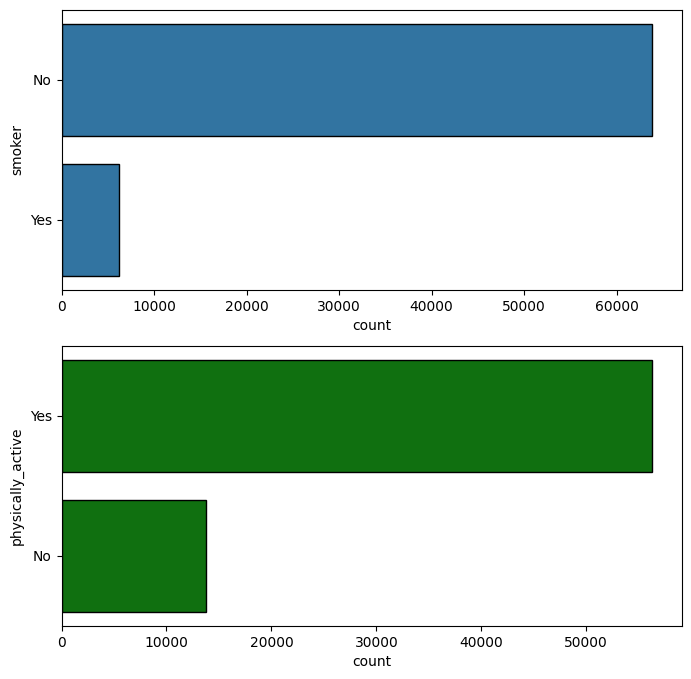

In [26]:
#Using seaborns countplot and subplot
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
#Setting my base color
base_color = sb.color_palette()[0]
sb.countplot(data = cardiovascular,y ='smoker',color=base_color, ax = ax[0], edgecolor='black')
sb.countplot(data = cardiovascular,y ='physically_active',color='green', ax = ax[1], edgecolor = 'black')
plt.show()

### Observation:
From the horizontal bar chart plotted it is noted that more than 60,000 patients do not smoke, And less than 10,000 do smoke.

Smoking has been proven to be one of the risk factors for Cardiovascular dieseases. we will be exploring this relationship of the smokers later on

For Physical Activity, we can see that more than 50,000 patients perform physical activities and less than 20,000 patients dont.



6. Distribution Based on Systolic and Diastolic

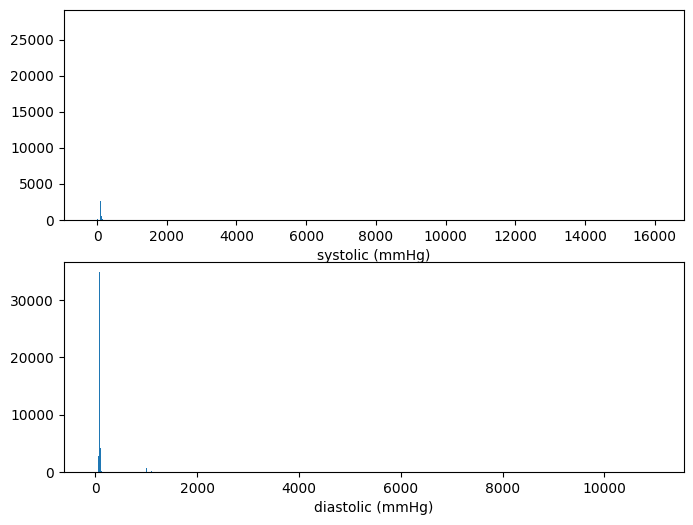

In [27]:
#using a standard scaled Hist plot and subplot

fig,ax = plt.subplots(nrows = 2, figsize =[8,6])
bp_variables = ['systolic','diastolic']
for i in range(len(bp_variables)):
    var = bp_variables[i]
    bins = np.arange(min(cardiovascular[var]), max(cardiovascular[var])+5, 5)
    ax[i].hist(data = cardiovascular, x = var, bins = bins)
    ax[i].set_xlabel('{} (mmHg)'.format(var))
plt.show()

### Observation:
From the first plotting for the distribution of both blood pressure variables, We discovered there were outliers in the dataset. During my preliminary wranglling we discovered there were some negative values and outrageously high values as the maximum for both the systolic and diastolic,So the outliers didnt come as a suprise.

It is worth taking a look at and filtering out this outliers in the dataset.

7. High Outliers and Low Outliers

In [28]:
#selecting and filtering out the outliers using criteria outballed from the plots
#Viewing the extreme high outliers in the dataset
high_outliers = (cardiovascular['systolic']> 250) | (cardiovascular['diastolic'] >120)
print(high_outliers.sum())
print(cardiovascular.loc[high_outliers,:])

1096
          id  age  gender  height  weight  systolic  diastolic  \
228      314   48    Male     183    98.0       160       1100   
241      334   61    Male     157    60.0       160       1000   
260      357   50  Female     150    83.0       140        800   
329      458   65  Female     176    63.0       160       1000   
345      482   52  Female     154    81.0       140       1000   
...      ...  ...     ...     ...     ...       ...        ...   
69771  99659   64  Female     167    81.0       160       1000   
69872  99798   60  Female     152    56.0       160       1000   
69878  99807   59    Male     168    95.0       160       1000   
69885  99816   62    Male     166    78.0       170       1000   
69967  99955   59    Male     168    63.0       140       1000   

      cholesterol_level glucose smoker alcoholic physically_active  \
228              Normal    High    Yes        No               Yes   
241                High  Normal     No        No              

In [29]:
#Creating a new subset dataframe and dropping the high outliers
cardiovascular_bp = cardiovascular[~high_outliers]
#cardiovascular_bp = cardiovascular.drop(cardio.index[[high_outliers]])
cardiovascular_bp

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,Male,168,76.0,120,80,Normal,Normal,Yes,No,Yes,No,26.9
69996,99995,62,Female,158,126.0,140,90,High,High,No,No,Yes,Yes,50.5
69997,99996,53,Male,183,105.0,180,90,Extremely High,Normal,No,Yes,No,Yes,31.4
69998,99998,62,Female,163,72.0,135,80,Normal,High,No,No,No,Yes,27.1


In [30]:
##Viewing the extreme low outliers in the newly created dataset
low_outliers =(cardiovascular_bp['systolic']<40) | (cardiovascular_bp['diastolic'] <40)
print(low_outliers.sum())
print(cardiovascular_bp.loc[low_outliers,:])

229
          id  age  gender  height  weight  systolic  diastolic  \
418      594   46  Female     157    72.0       150         30   
567      815   59  Female     168    78.0        14         90   
927     1294   60    Male     175    70.0        14         90   
979     1360   50  Female     172    65.0        11         80   
1600    2260   53  Female     165    66.0        12         80   
...      ...  ...     ...     ...     ...       ...        ...   
68630  98039   59  Female     160    59.0        12         80   
68742  98213   52  Female     158    74.0        14         90   
68998  98568   53  Female     154    77.0        14         90   
69137  98743   43    Male     176    65.0        12         80   
69549  99328   59  Female     155    69.0        13         90   

      cholesterol_level         glucose smoker alcoholic physically_active  \
418              Normal          Normal     No        No               Yes   
567                High          Normal     No 

In [31]:
#Dropping the low outliers from the newly created dataset
cardiovascular_bp = cardiovascular_bp[~low_outliers]
#cardiovascular_bp_bp = cardiovascular_bp.drop(cardiovascular_bp.index[[low_outliers]])
cardiovascular_bp

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,Male,168,76.0,120,80,Normal,Normal,Yes,No,Yes,No,26.9
69996,99995,62,Female,158,126.0,140,90,High,High,No,No,Yes,Yes,50.5
69997,99996,53,Male,183,105.0,180,90,Extremely High,Normal,No,Yes,No,Yes,31.4
69998,99998,62,Female,163,72.0,135,80,Normal,High,No,No,No,Yes,27.1


This dataframe cardiovascular_bp - do not have any high or low outliers at all

In [32]:
cardiovascular_bp.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0


### Observation:
Having observed the extreme high and low outliers. It was of note that these numbers must have been due to human error when inputting.When combined, it is less than 2% of the dataset so we decided to drop these rows and put them into a new dataframe for replotting.

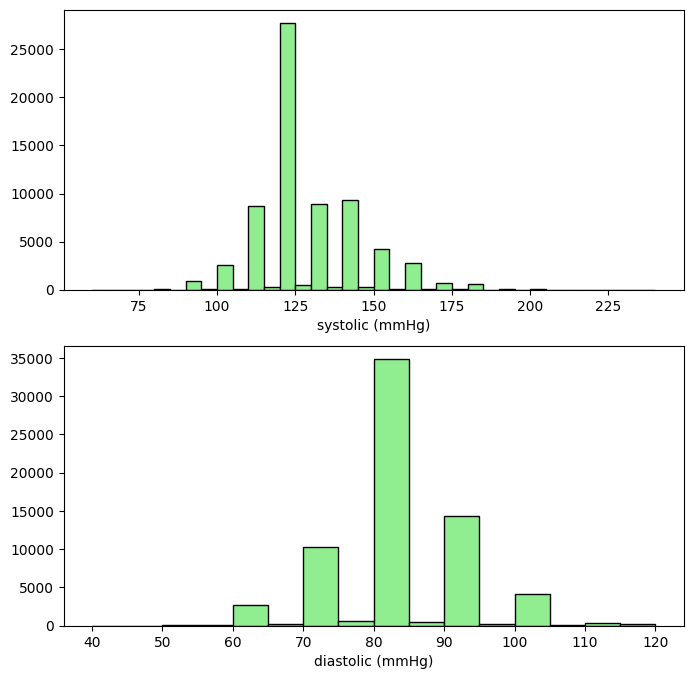

In [33]:
#Using hist plot

fig,ax = plt.subplots(nrows = 2, figsize =[8,8])

bp_variables = ['systolic','diastolic']
for i in range(len(bp_variables)):
    var = bp_variables[i]
    bins = np.arange(min(cardiovascular_bp[var]), max(cardiovascular_bp[var])+5, 5)
    ax[i].hist(data = cardiovascular_bp, x = var, bins = bins, color='lightgreen', edgecolor='black')
    ax[i].set_xlabel('{} (mmHg)'.format(var))
plt.show()

### Observation:
is observed that both distributions are unimodal and the peak for patients with systolic blood pressure fell between 120 and 125.The distribution also shows that alot of patients fall in between 120 and 225. From medical perspective it can be inferred that most patients in the distribution have high systolic blood pressure.

From the diastolic distribution, the peak blood pressure fell between 80 and 85. From the obseravtion, most of the patients fall in between 80 and 120.From medical perspective it can be inferred that most patients in the distribution have high diastolic blood pressure.

From the exploration of the two variables, it is observed that majority of the patients fall into the category that is indicative of high blood pressure. As the normal blood pressure for Systolic is 90-120mmHg and that of diastolic is 60-80mmHg.

We will explore their relationship further.



8. Cardiovascular disease

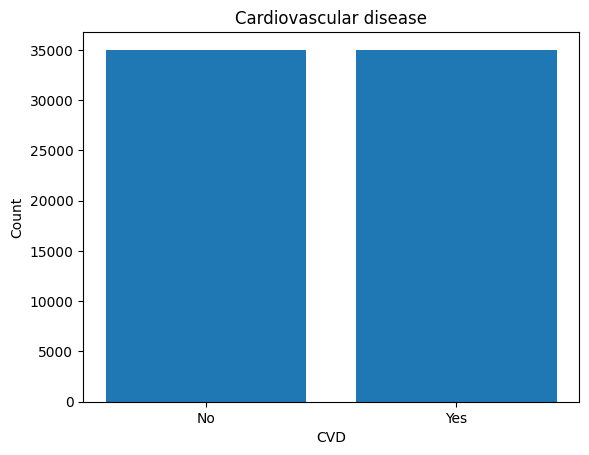

In [34]:
#Using matplotlib bar chart
#Return series with unique and value_counts
x= cardiovascular['cardiovascular_disease'].unique()
y = cardiovascular['cardiovascular_disease'].value_counts(sort = False)
plt.bar(x,y)
plt.title('Cardiovascular disease')
plt.xlabel('CVD')
plt.ylabel('Count')
plt.show()

### Observation:
This is really interesting as the target variable upon plotting shows a 50|50 interpretation. This means The people with cardiovascular disease is approximately equal to people without.

This concludes the first aspect of my exploration.

### Univariate exploration summary
>After Univariate exploration of the variables of our interest, which is all except the id variable. we discovered interesting patterns in some of the variables, such as the cholesterol, bmi,systolic,diastolic,weight,smoke and the cardiovascular disease. Which we will further explore to see relationshps in some. we did not see a need to carry out any major transformations to see the pattern in the variabes properly.

>we carried out transformations  on the systolic and diastolic variables where i filtered out the extreme low and high outliers and put it into a new dataset.This was because they contained extreme numbers after investigation which could have been due to human error. and we discovered interesting patters after replotting.


## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the
data.

To start off with, we want to look at the pairwise correlations present between features in the data.

In [35]:
#creating a list of my numeric variables
numeric_vars = ['height','weight','systolic','diastolic','bmi']

numeric_vars

['height', 'weight', 'systolic', 'diastolic', 'bmi']

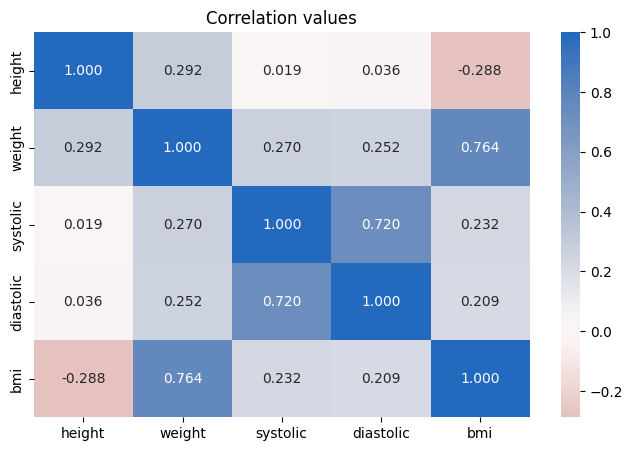

In [36]:
#correlation plot using my new dataframe
plt.figure(figsize=[8,5])
sb.heatmap(cardiovascular_bp[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation values')
plt.show()

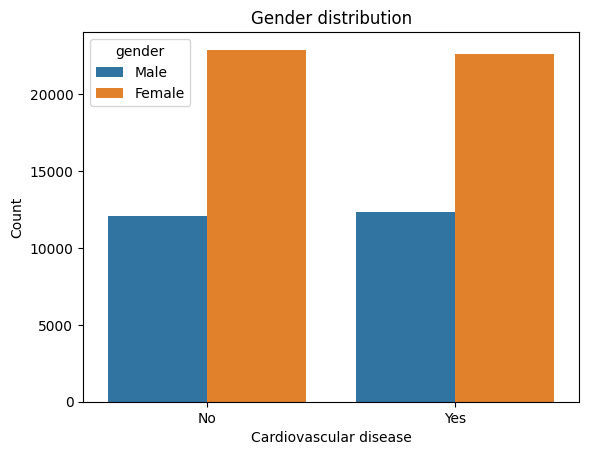

In [37]:
#using seaborns countplot
sb.countplot(data = cardiovascular,x='cardiovascular_disease',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

In [38]:
#creating a categorical version of diastolic, using floor division(lowest integer divisor)
cardiovascular_bp['diastolic_category'] =((cardiovascular_bp['diastolic']//10)*10).astype(int)

/tmp/ipython-input-2797978350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardiovascular_bp['diastolic_category'] =((cardiovascular_bp['diastolic']//10)*10).astype(int)


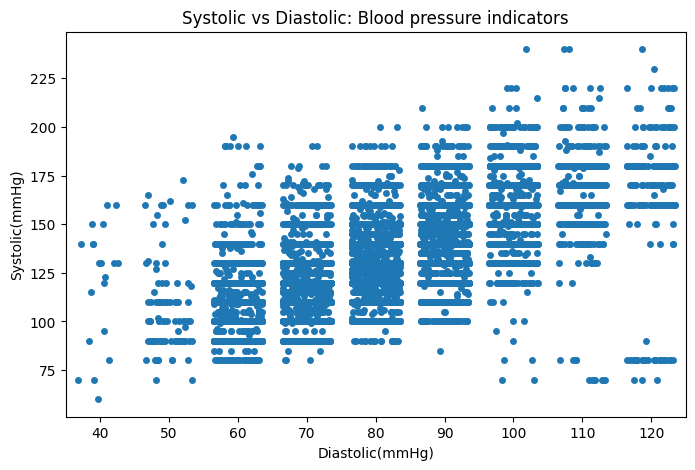

In [39]:
#using seaborn scatter plot and alpha to reduce overplotting and see distribution well
plt.figure(figsize=[8,5])
#setting a bse color
base_color = sb.color_palette()[0]
sb.stripplot(data= cardiovascular_bp,x='diastolic_category',y='systolic',jitter=0.35,color = base_color)
#Setting axis and title labels
plt.title('Systolic vs Diastolic: Blood pressure indicators')
plt.xlabel('Diastolic(mmHg)')
plt.ylabel('Systolic(mmHg)');

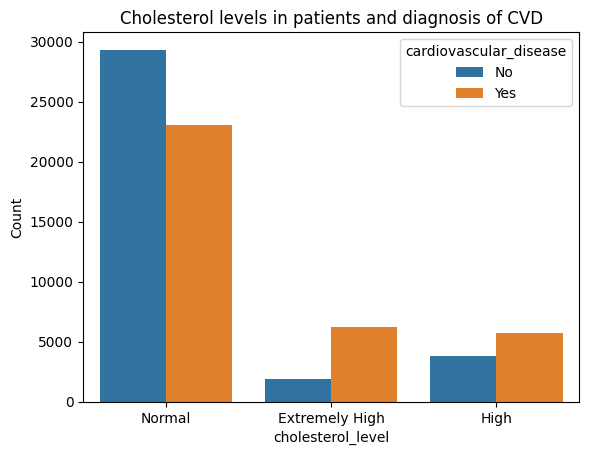

In [40]:
#using a clustered bar chart
sb.countplot(data = cardiovascular,x='cholesterol_level',hue='cardiovascular_disease')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol_level')
plt.ylabel('Count');

In [41]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(cardiovascular.shape[0],1000,replace = False)
cardio_subset = cardiovascular.iloc[sample]

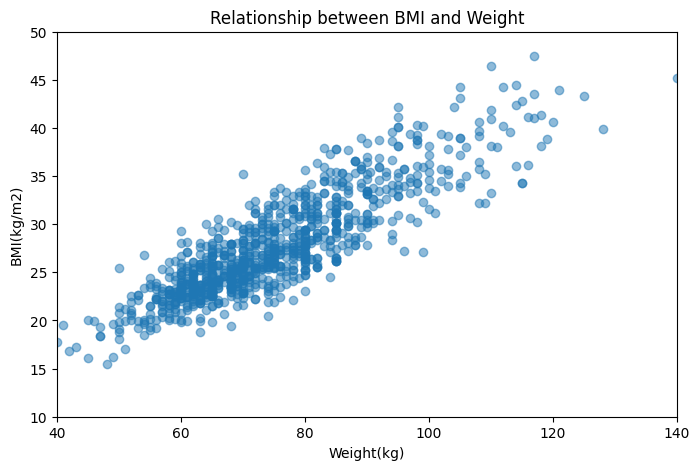

In [42]:
#Using scatter plot and setting figure size
plt.figure(figsize=[8,5])
plt.scatter(data = cardio_subset, x ='weight', y = 'bmi',alpha = 1/2)
#setting axis limits to view the plot distribution better
plt.ylim((10,50))
plt.xlim((40,140))
#setting title and axis labels
plt.title('Relationship between BMI and Weight')
plt.ylabel('BMI(kg/m2)')
plt.xlabel('Weight(kg)');

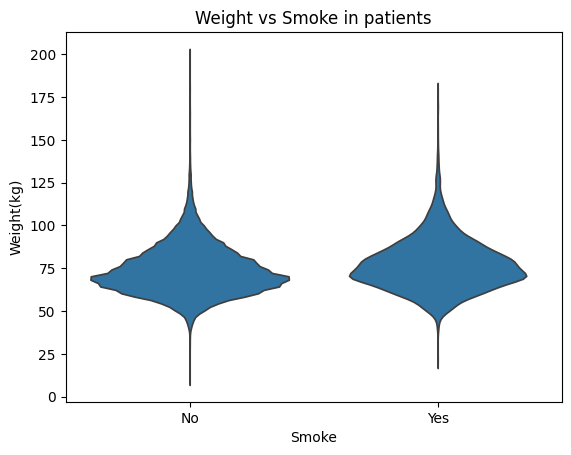

In [43]:
#Using seabornviolin plot to see the weight and smoking variable

#setting a base color
base_color = sb.color_palette()[0]

sb.violinplot(data=cardiovascular, x='smoker', y='weight',color=base_color, inner=None)
plt.title('Weight vs Smoke in patients')
plt.xlabel('Smoke')
plt.ylabel('Weight(kg)');

### Observation:
From our observation of these plots there doesnt really seem to be a significant relationship or difference in the distribution of weight for those who smoke or do not smoke. we will not be exploring this variables further.

>This is the end of the bivariate distribution.

### Bivariate Exploration Summary
> The systolic and diastolic variables have a very interesting relationship as suspected. From the correlation chart it was shown that they have very low correlation(relationship) with the other numeric variables in the dataset. We went ahead to plot them together to see their relationship besides the correlation number.
We also discovered relationships between the BMI and weight positive relationship, that bmi increases as weight increases.
Worthy of note too is the gender and cardiovascular disease relationship, it was observed that more females have cardiovascular diseases than the males.

> We discovered another interesting relationship between the cholesterol and the cardiovascular disease variable.Some Patients in all levels of cholesterol had cardiovascular disease.Prior to the exploration we expected there to be less patients with normal cholesterol to have a cardiovascular disease. This is also normal, as cholesterol is not the only causative factor of cardiovascular diseases.

 ## Multivariate Exploration

> In this section we will be performing multivariate exploration on three or more variables. The main variabes we want to explore more is the relationship between the bmi, weight, systolic, diastolic and cardiovascular disease.

We will start by exploring the relationship between CVDisease, Weight and BMI

In [44]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(cardio.shape[0],500,replace = False)
cardio_subset = cardio.iloc[sample]

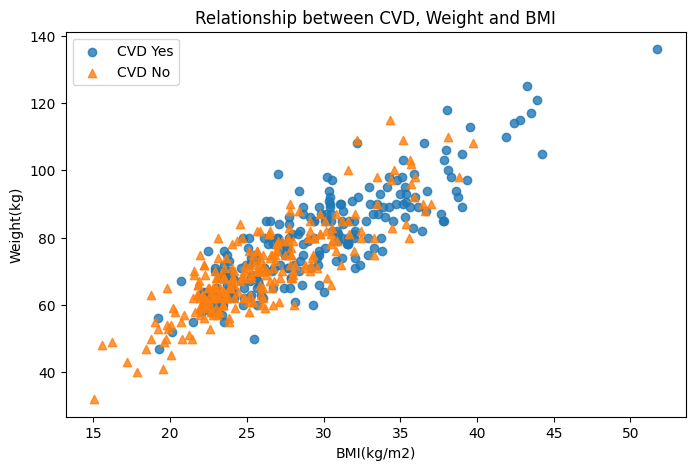

In [45]:
#setting my figure size
plt.figure(figsize=[8,5])
#Creating markers for the categories
cvd_markers =[['Yes','o'],['No','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardiovascular_disease']== cvd]
    sb.regplot(data = plot_data,x='bmi',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI(kg/m2)')
plt.ylabel('Weight(kg)')
plt.legend(['CVD Yes','CVD No']);

#### Observations:
After getting a sample size for the dataset to reduce overplotting. From observation it is of note to say that majority of the patients diagnosed with a cardiovascular disease have high body mass index(bmi) and are very clustered from 25 above which is indicative for for obesity. And majority of the patients with Bmi less than 30 fall into the category of patients without cardiovascular disease.Likewise for the weight axis as majority of the patients with weight below 80kg do not have a cardiovascular disease.

It is plausible to say that having a bmi greater than 25 and weight greater than 80 is indicative of being diagnosed with a cardiovascular disease. Viceversa too for patients without a cardiovascular disease.

Distribution of Systolic, Diastolic and CVD

In [46]:
#creating a categorical version of diastolic, using floor division(lowest integer divisor)
cardiovascular_bp['diastolic_category'] =((cardiovascular_bp['diastolic']//10)*10).astype(int)

/tmp/ipython-input-2797978350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardiovascular_bp['diastolic_category'] =((cardiovascular_bp['diastolic']//10)*10).astype(int)


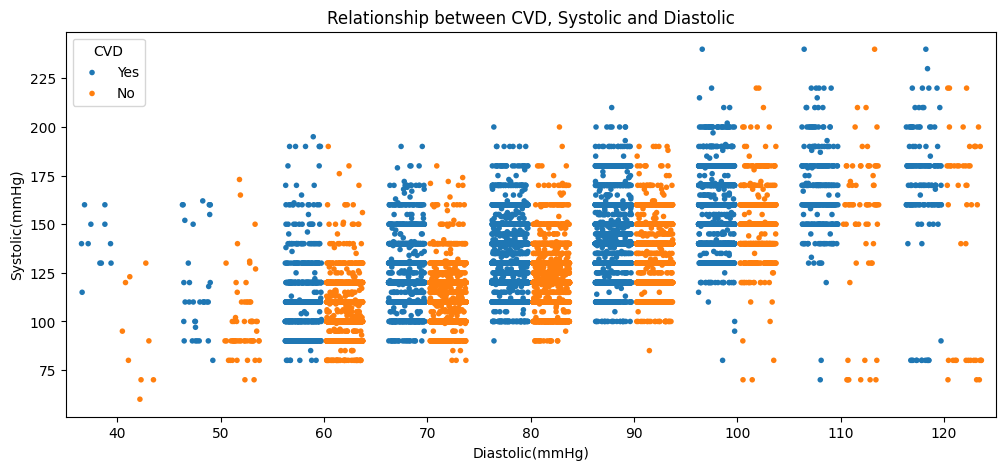

In [47]:
#Using seaborns stripplot using the diastolic category created
plt.figure(figsize=[12,5])
sb.stripplot(data=cardiovascular_bp,x='diastolic_category',y = 'systolic',hue='cardiovascular_disease',jitter = 0.35,dodge = True,size=4)
#setting title and axis labels
plt.title('Relationship between CVD, Systolic and Diastolic')
plt.xlabel('Diastolic(mmHg)')
plt.ylabel('Systolic(mmHg)')
plt.legend(['Yes','No'],title='CVD');

#### Observation:
This is an interesting relationship.We created used jitter and dodge to reduce overplotting. Previously we noted that the systolic and diastolic were correlated but not as high as the correlation between weight and bmi. And we can see that although correlated, there are a alot of outliers which also means that the distribution of these variables does not belong to the category of a one size fits all,meaning blood pressure levels using both variables is different for every patient.

Having this in mind, We created a scatter plot using diastolic as a category to see their relationship with cardiovascular disease diagnosis. And from my observation this is a sparsed distribution.More than Half of the distribution have a systolic greater than 125 and diastolic greater than 80. There are patients with systolic lower than 125 and diastolic lower than 80 with a cardiovascular disease. And patients with a high systolic and high diastolic with and without a cardiovascular disease.

It is plausible to say that although systolic and diastolic are used to measure blood pressure, having a high blood pressure doesnt necessarily indicate presence of a cardiovascular disease. Other risk facftors are involved in this set of patients.


### Multivariate exploration summary
   > The weight and bmi features of the dataset with the CV disease really showed a strong positive relationship. previously observing the relationships of the weight and bmi, We suspected there was a possible relationship with the cardiovascular disease and it turned out to be right. Majority of the patients with a bmi greater than 25 and weight grater than 80 were diagnosed with having a cardiovascular disease and most of those lower did not.


> The suprising relationship we noticed was between systolic,diastolic and diagnosis of cardiovascular disease. We had a previous assumption that majority of the patients with CVD will fall into the category of a high systolic and a high diastolic. But it turned out to be a spearse distribution but with a number of the patients falling into the high systolic and diatolic category.

## Conclusions

> 1) The amount of Females that have cardiovascular diseases is about 14,000 more than the males that have this cardiovascular disease.

 This was first explored by checking the general population plot where I discovered that approximately 50% of the population had and the other 50% did not have cardiovasculr disease. I furthered explored the distribution with gender where I observed and concluded that more females have cardiovascular diseases than the males.


> 2) Most Patients in the distribution have a BMI greater than 25:

   This was suspected from the first exploration of the bmi variable alone, After plotting the relationship with weight, it showed a large distribution of patients fell into the bmi greater than 25.

> 3) Patients with BMI greater than 25kg/m2 and Weight above 80kg have cardiovascular disease:

This finding was concluded from exploring the individual variables, i.e the weight, bmi and cardiovascular disease,with plots, then the relationship between Bmi and weight and the final exploration of the relationship between all three variables using scattered plots.

> 4) A large distribution of the patients have high blood pressure.

This finding was concluded from exploring the systolic and diastolic variables individually then their relationship together where a positive correlation was noticed too. A final scatter plot was plotted to see the relationship between all three variables.

